In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
matches=pd.read_csv("/content/drive/MyDrive/Copy of matches.csv")
deliveries=pd.read_csv("/content/drive/MyDrive/Copy of deliveries.csv")

In [ ]:
matches.sample(5)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
542,980951,2016,Delhi,2016-04-30,League,CR Brathwaite,Feroz Shah Kotla,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,Delhi Daredevils,runs,27.0,187.0,20.0,N,NaN,KN Ananthapadmanabhan,M Erasmus
1069,1426284,2024,Chennai,2024-04-28,League,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Chennai Super Kings,runs,78.0,213.0,20.0,N,NaN,R Pandit,MV Saidharshan Kumar
575,981017,2016,Delhi,2016-05-27,Qualifier 2,DA Warner,Feroz Shah Kotla,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,4.0,163.0,20.0,N,NaN,M Erasmus,CK Nandan
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
573,981013,2016,Bangalore,2016-05-24,Qualifier 1,AB de Villiers,M Chinnaswamy Stadium,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,159.0,20.0,N,NaN,AK Chaudhary,HDPK Dharmasena


In [ ]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
46596,501220,1,Kings XI Punjab,Rajasthan Royals,12,2,SE Marsh,AS Raut,KD Karthik,4,0,4,NaN,0,NaN,NaN,NaN
141013,1082609,1,Sunrisers Hyderabad,Kings XI Punjab,16,3,DA Warner,MM Sharma,DJ Hooda,1,0,1,NaN,0,NaN,NaN,NaN
205301,1254106,2,Rajasthan Royals,Kolkata Knight Riders,10,3,R Tewatia,CV Varun,JD Unadkat,1,0,1,NaN,0,NaN,NaN,NaN
189704,1216535,2,Mumbai Indians,Delhi Capitals,13,5,Ishan Kishan,P Dubey,SA Yadav,1,0,1,NaN,0,NaN,NaN,NaN
24642,392229,2,Deccan Chargers,Kings XI Punjab,17,5,RG Sharma,WA Mota,DB Ravi Teja,0,0,0,NaN,0,NaN,NaN,NaN


**HANDLING NULL VALUES**

In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
matches.drop('method',axis=1,inplace=True)

In [ ]:
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


**HANDLING DUPLICATES**

In [ ]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

58
19
38


In [ ]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans','Kings XI Punjab':'Punjab Kings','Pune Warriors':'Rising Pune Supergiant','Deccan Chargers':'Sunrisers Hyderabad'}
matches.replace(to_replace=team_dup,inplace=True)

In [ ]:
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)

In [ ]:

matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

In [ ]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
15
34


**HANDLING DUPLICATES IN DELIVERIES**

In [ ]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
deliveries.replace(to_replace=team_dup,inplace=True)

**SOME INSIGHTS**

BEST BATTER AND BOWLER OF THE YEAR

In [ ]:
merged_data = deliveries.merge(matches, left_on='match_id', right_on='id')
def best_batter_bowler(year):
  #top_batter
  part_year_data=merged_data[merged_data['season']==year]

  batter_data=part_year_data.groupby('batter')['batsman_runs'].sum().reset_index()
  top_batter=batter_data.sort_values(by='batsman_runs',ascending=False)
  print("Top Batter")
  print(top_batter.head(1))

  #top_bowler
  bowler_data = part_year_data[['match_id', 'bowler', 'is_wicket', 'total_runs']]
  performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
  ).reset_index()
  bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
  top_bowler=bowlers.sort_values(by="wickets",ascending=False)
  print("Top Bowler:")
  print(top_bowler.head(1))

  #batter with highest strike rate
  batsman_data = part_year_data[['batter', 'batsman_runs']]
  runs = batsman_data.groupby('batter')['batsman_runs'].sum().reset_index()
  runs.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)
  balls_faced = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size().reset_index(name='balls_faced')
  batsman_stats = pd.merge(runs, balls_faced, on='batter')
  batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
  top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(1)
  print("Batter with highest strike rate")
  print(top_10_batsmen)

  #bowler with low economy rate
  bowler_stats = part_year_data.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_balls=('ball', 'count')
  ).reset_index()

  # Step 2: Calculate Overs Bowled
  bowler_stats['overs'] = bowler_stats['total_balls'] // 6

  # Step 3: Filter out bowlers with zero overs to avoid division errors
  bowler_stats = bowler_stats[bowler_stats['overs'] > 0]

  # Step 4: Calculate Economy Rate
  bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs']

  # Step 5: Sort and Get Top 10 Bowlers with Lowest Economy Rate
  top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(1)
  print("bowler with low economy rate")
  print(top_10_economy_bowlers)


In [ ]:
best_batter_bowler('2012')

Top Batter
      batter  batsman_runs
36  CH Gayle           733
Top Bowler:
      bowler  wickets
70  M Morkel       30
Batter with highest strike rate
             batter  total_runs  balls_faced  strike_rate
84  KMDN Kulasekara           5            3   166.666667
bowler with low economy rate
      bowler  total_runs_conceded  total_balls  overs  economy_rate
66  L Balaji                  169          189     31      5.451613


**DELIVERABLES OF IPL INFOGRAPHICS**

TOP 10 BATSMAN

In [ ]:
batsman=deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
sorted_batsman=batsman.sort_values(by='batsman_runs',ascending=False)
top_10_batsman=sorted_batsman.head(10)
top_10_batsman

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


Text(0, 0.5, 'scores')

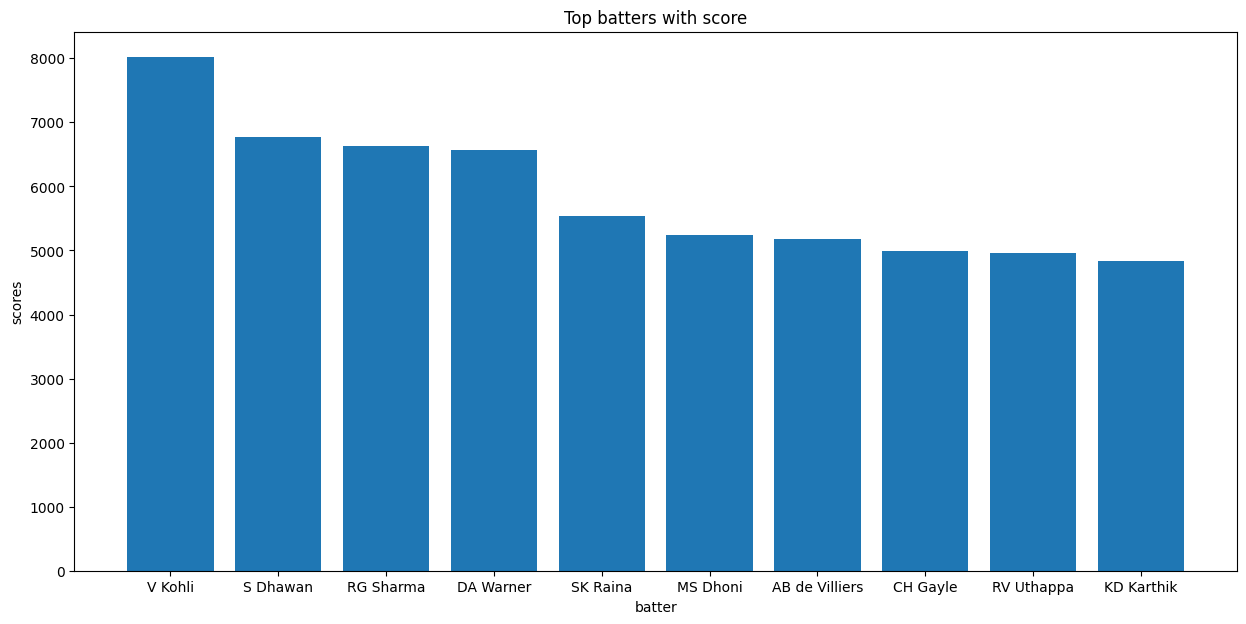

In [ ]:
player=top_10_batsman['batter']
scores=top_10_batsman['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

**TOP 10 BOWLERS**

In [ ]:
bowler_data = deliveries[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()


In [ ]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


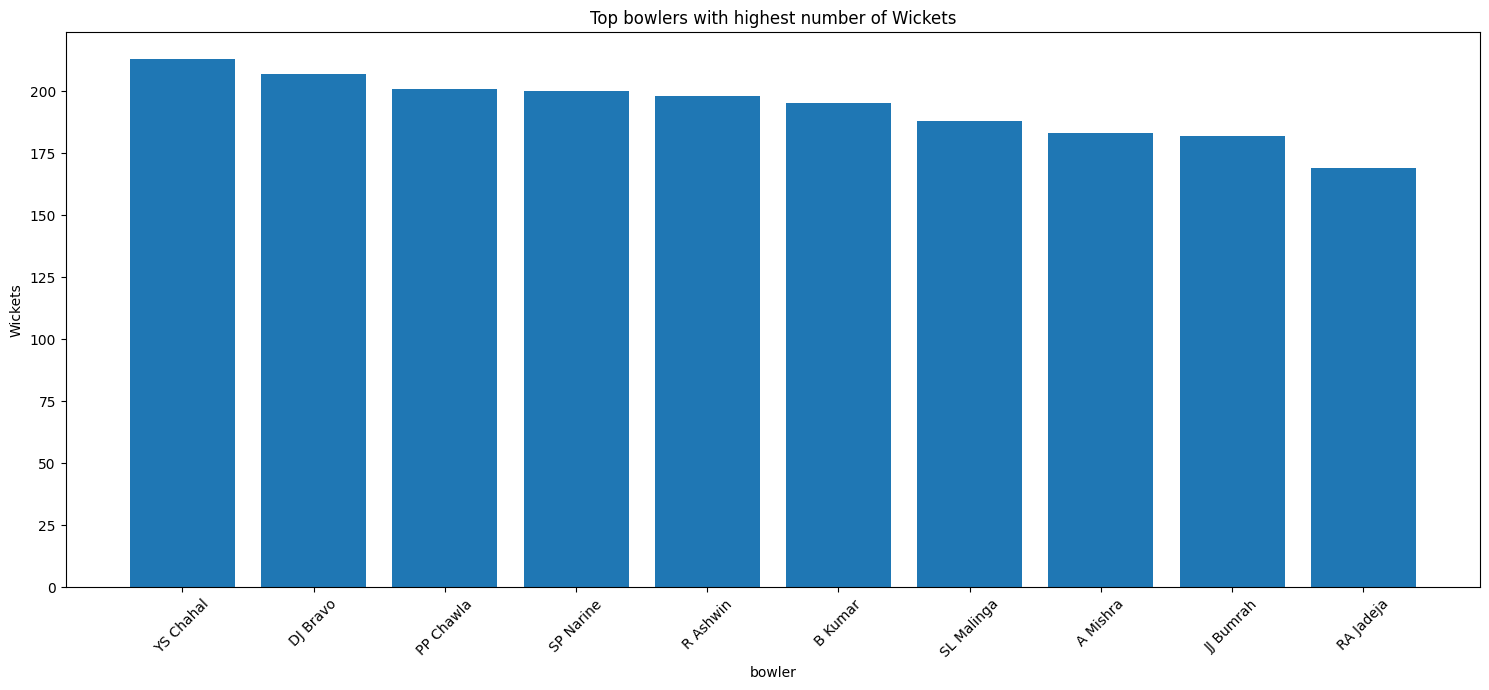

In [ ]:
top_10_bowlers=top_bowlers['bowler']
wickets_scored=top_bowlers['wickets']
fig = plt.figure(figsize = (15,7))
plt.bar(top_10_bowlers,wickets_scored)
plt.title('Top bowlers with highest number of Wickets')
plt.xlabel('bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()


**PLAYER LEVEL ANALYSIS**

TOP 10 BATSMAN STRIKE RATE ANALYSIS

In [ ]:
batsman_data = deliveries[['batter', 'batsman_runs']]
runs = batsman_data.groupby('batter')['batsman_runs'].sum().reset_index()
runs.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)
balls_faced = deliveries[deliveries['extras_type'] != 'wides'].groupby('batter').size().reset_index(name='balls_faced')
batsman_stats = pd.merge(runs, balls_faced, on='batter')
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100
top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)
print(top_10_batsmen)


              batter  total_runs  balls_faced  strike_rate
312           L Wood           9            3   300.000000
97        B Stanlake           5            2   250.000000
234  J Fraser-McGurk         330          141   234.042553
461    R Sai Kishore          13            6   216.666667
629         Umar Gul          39           19   205.263158
497         RS Sodhi           4            2   200.000000
465       R Shepherd         115           63   182.539683
410       Naman Dhir         140           79   177.215190
318        LJ Wright         106           60   176.666667
583    Shahid Afridi          81           46   176.086957


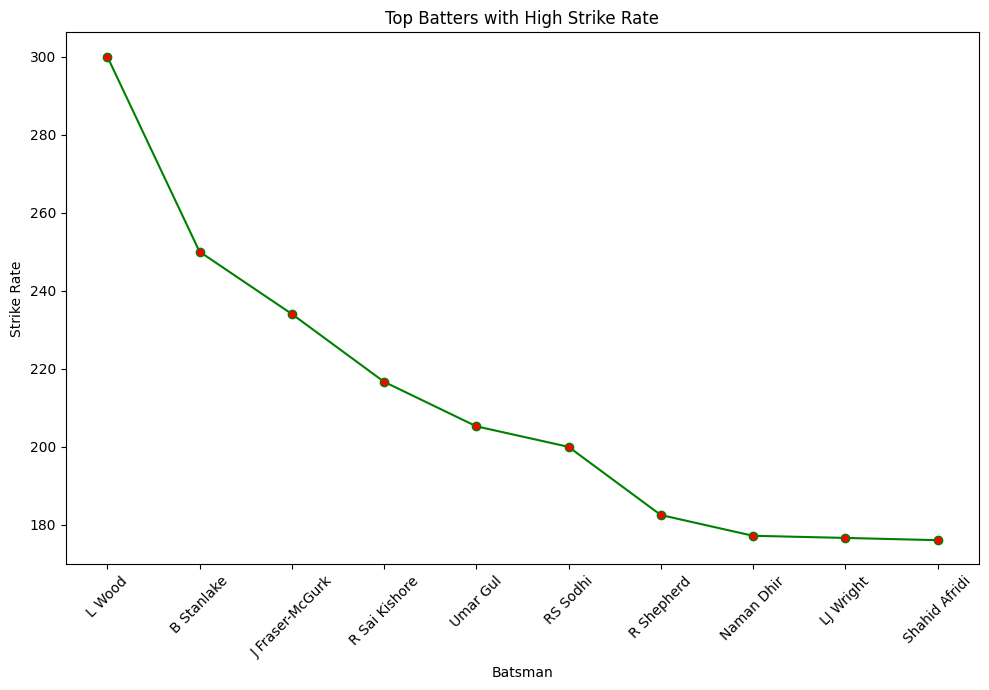

In [ ]:
top_batter_strike=top_10_batsmen['batter']
strike_rate=top_10_batsmen['strike_rate']
fig=plt.figure(figsize=(10,7))
plt.plot(top_batter_strike, strike_rate,marker='o',mfc = 'r', color='green', linestyle='-')
plt.title("Top Batters with High Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.tight_layout()

**TOP 15 PLAYER WHO WON MAN OF MATCH**

In [ ]:
man_of_match=matches.player_of_match.value_counts().reset_index()
top_15=man_of_match.head(15)
top_15

,player_of_match,count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


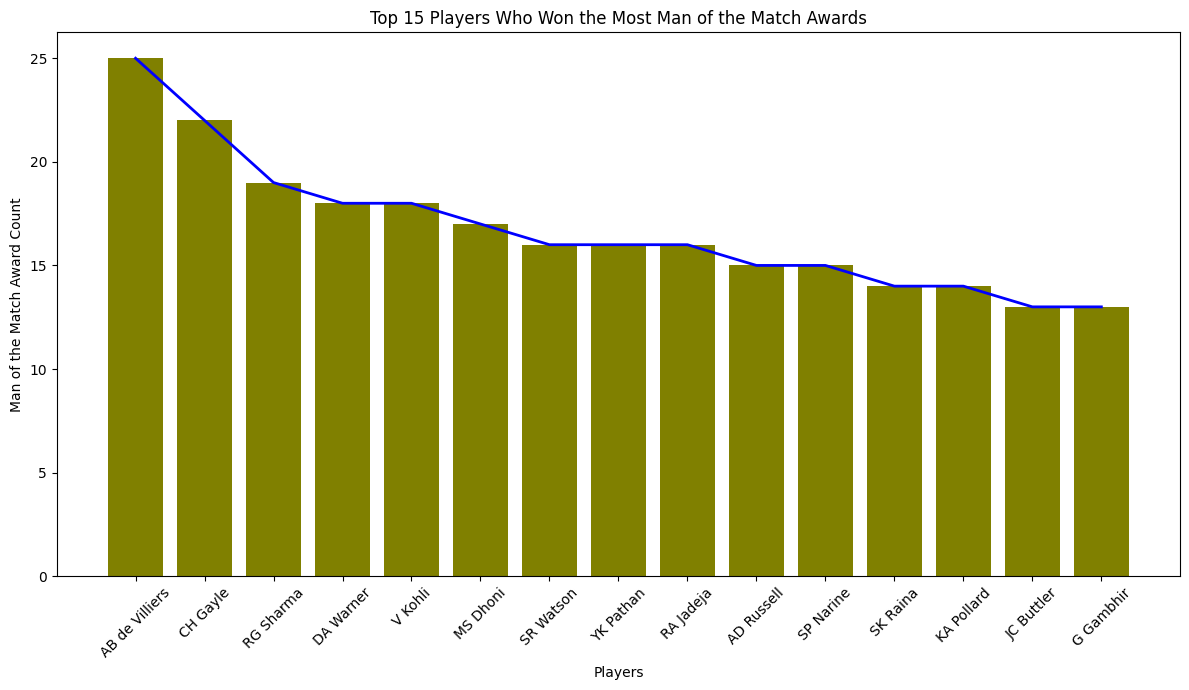

In [ ]:
plt.figure(figsize=(12, 7))
bars = plt.bar(top_15["player_of_match"], top_15["count"], color='olive', label='Man of the Match Count')
plt.plot(top_15["player_of_match"], top_15["count"], color='blue', linestyle='-', linewidth=2, label='Trend Line')
plt.title("Top 15 Players Who Won the Most Man of the Match Awards")
plt.xlabel("Players")
plt.ylabel("Man of the Match Award Count")
plt.xticks(rotation=45)
plt.tight_layout()


**Innings wise batting and bowling averages for each team**

---



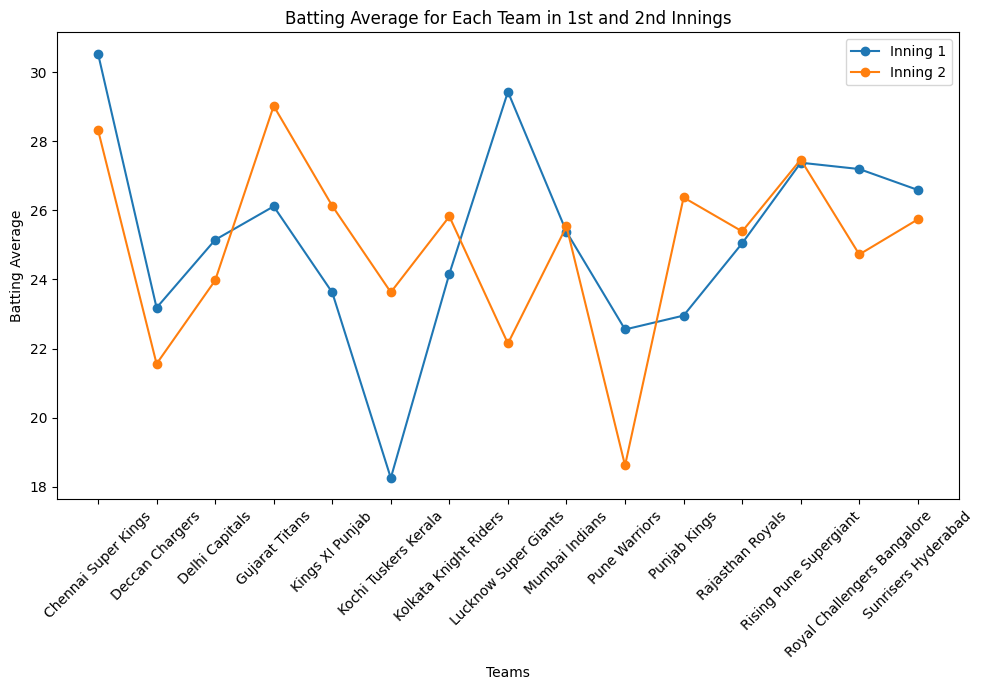

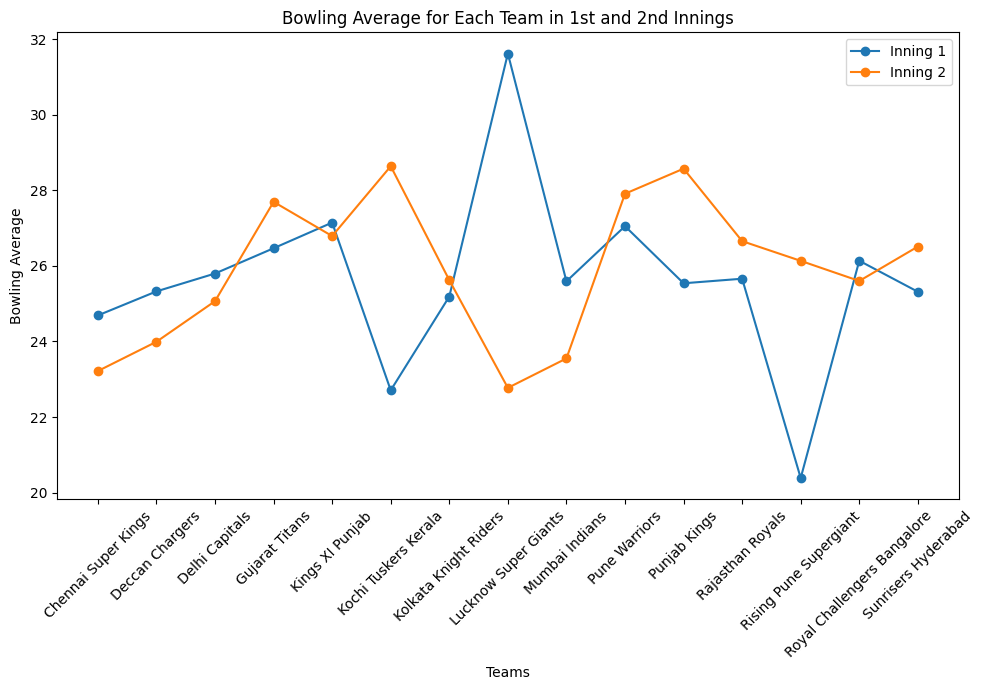

In [ ]:

merged_data = deliveries.merge(matches, left_on='match_id', right_on='id')

# Step 1: Calculate Batting Average
batting_data = merged_data[['inning', 'batting_team', 'batsman_runs', 'is_wicket']]
batting_summary = batting_data.groupby(['inning', 'batting_team']).agg(
    Total_Runs=('batsman_runs', 'sum'),
    Total_Outs=('is_wicket', 'sum')
).reset_index()
batting_summary['Batting_Average'] = batting_summary['Total_Runs'] / batting_summary['Total_Outs']

# Step 2: Calculate Bowling Average
bowling_data = merged_data[['inning', 'bowling_team', 'batsman_runs', 'is_wicket']]
bowling_summary = bowling_data.groupby(['inning', 'bowling_team']).agg(
    Total_Runs_Conceded=('batsman_runs', 'sum'),
    Total_Wickets=('is_wicket', 'sum')
).reset_index()
bowling_summary['Bowling_Average'] = bowling_summary['Total_Runs_Conceded'] / bowling_summary['Total_Wickets']

# Step 3: Plot Batting Average
plt.figure(figsize=(10,7))
for inning in [1, 2]:
    data = batting_summary[batting_summary['inning'] == inning]
    plt.plot(data['batting_team'], data['Batting_Average'], marker='o', linestyle='-', label=f"Inning {inning}")

plt.title("Batting Average for Each Team in 1st and 2nd Innings")
plt.xlabel("Teams")
plt.ylabel("Batting Average")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Plot Bowling Average
plt.figure(figsize=(10,7))
for inning in [1, 2]:
    data = bowling_summary[bowling_summary['inning'] == inning]
    plt.plot(data['bowling_team'], data['Bowling_Average'], marker='o', linestyle='-', label=f"Inning {inning}")

plt.title("Bowling Average for Each Team in 1st and 2nd Innings")
plt.xlabel("Teams")
plt.ylabel("Bowling Average")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**TOP 10 BOWLERS ECONOMY RATE ANALYSIS**

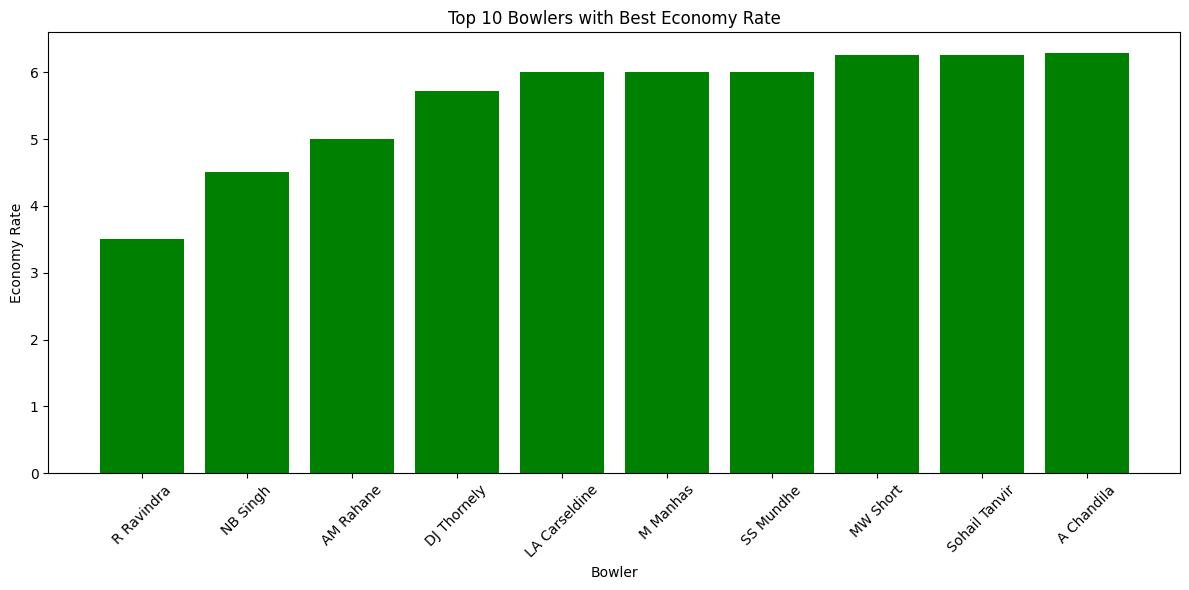

In [ ]:
# Step 1: Calculate Total Runs Conceded and Balls Bowled for Each Bowler
bowler_stats = deliveries.groupby('bowler').agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

# Step 2: Calculate Overs Bowled
bowler_stats['overs'] = bowler_stats['total_balls'] // 6

# Step 3: Filter out bowlers with zero overs to avoid division errors
bowler_stats = bowler_stats[bowler_stats['overs'] > 0]

# Step 4: Calculate Economy Rate
bowler_stats['economy_rate'] = bowler_stats['total_runs_conceded'] / bowler_stats['overs']

# Step 5: Sort and Get Top 10 Bowlers with Lowest Economy Rate
top_10_economy_bowlers = bowler_stats.sort_values(by='economy_rate').head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_economy_bowlers['bowler'], top_10_economy_bowlers['economy_rate'], color='green')
plt.title('Top 10 Bowlers with Best Economy Rate')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()



**Overall Performance by Top 10 Performers**

In [ ]:
# Batting Performance
batting = deliveries.groupby('batter').agg(
    Total_Runs=('batsman_runs', 'sum'),
    Balls_Faced=('ball', 'count'),
    Dismissals=('is_wicket', 'sum')
).reset_index()
batting['Strike_Rate'] = (batting['Total_Runs'] / batting['Balls_Faced']) * 100
batting['Batting_Average'] = batting.apply(
    lambda x: x['Total_Runs'] if x['Dismissals'] == 0 else x['Total_Runs'] / x['Dismissals'], axis=1
)

# Bowling Performance
bowling = deliveries.groupby('bowler').agg(
    Total_Wickets=('is_wicket', 'sum'),
    Total_Runs_Conceded=('batsman_runs', 'sum'),
    Total_Balls=('ball', 'count')
).reset_index()
bowling['Overs'] = bowling['Total_Balls'] // 6
bowling['Economy_Rate'] = bowling['Total_Runs_Conceded'] / bowling['Overs']
bowling['Bowling_Average'] = bowling['Total_Runs_Conceded'] / bowling['Total_Wickets']

# Fielding Performance
fielding = deliveries.groupby('fielder').agg(
    Total_Catches=('is_wicket', 'sum')
).reset_index()

all_rounders = pd.merge(batting, bowling, left_on='batter', right_on='bowler', how='inner')
all_rounders = pd.merge(all_rounders, fielding, left_on='batter', right_on='fielder', how='left')

# Fill missing fielding stats with 0
all_rounders['Total_Catches'] = all_rounders['Total_Catches'].fillna(0)

# Normalize Metrics

# Normalize Batting Scores
max_batting_average = all_rounders['Batting_Average'].max()

if max_batting_average > 0:
    all_rounders['Batting_Score'] = all_rounders['Batting_Average'] / max_batting_average
else:
    all_rounders['Batting_Score'] = 0  # If no player has a valid batting average
all_rounders['Bowling_Score'] = all_rounders['Total_Wickets'] / all_rounders['Total_Wickets'].max()
all_rounders['Fielding_Score'] = all_rounders['Total_Catches'] / all_rounders['Total_Catches'].max()
# Weighted All-Rounder Score
all_rounders['All_Rounder_Score'] = (
    0.4 * all_rounders['Batting_Score'] +
    0.4 * all_rounders['Bowling_Score'] +
    0.2 * all_rounders['Fielding_Score']
)
top_all_rounders = all_rounders.sort_values('All_Rounder_Score', ascending=False).head(10)
print(top_all_rounders[['batter', 'All_Rounder_Score']])


            batter  All_Rounder_Score
108       DJ Bravo           0.615163
332      RA Jadeja           0.612453
159  Iqbal Abdulla           0.507408
315       R Ashwin           0.500640
396      SP Narine           0.498290
308      PP Chawla           0.494401
466      YS Chahal           0.472305
65         B Kumar           0.455961
39        AR Patel           0.452262
8         A Mishra           0.442275


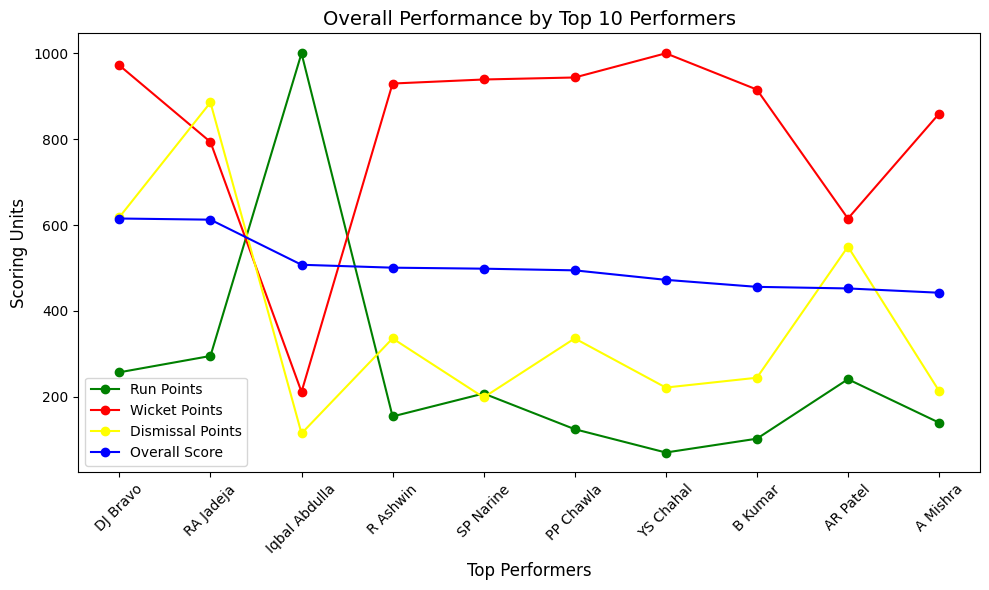

In [ ]:
players = top_all_rounders['batter']
run_points = top_all_rounders['Batting_Score'] * 1000  # Scaled for visualization
wicket_points = top_all_rounders['Bowling_Score'] * 1000
dismissal_points = top_all_rounders['Fielding_Score'] * 1000
overall_score = top_all_rounders['All_Rounder_Score'] * 1000
plt.figure(figsize=(10, 6))
plt.plot(players, run_points, label="Run Points", color='green', marker='o')
plt.plot(players, wicket_points, label="Wicket Points", color='red', marker='o')
plt.plot(players, dismissal_points, label="Dismissal Points", color='yellow', marker='o')
plt.plot(players, overall_score, label="Overall Score", color='blue', marker='o')
plt.title("Overall Performance by Top 10 Performers", fontsize=14)
plt.xlabel("Top Performers", fontsize=12)
plt.ylabel("Scoring Units", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


**Head-to-head match analysis between IPL teams**

<Axes: >

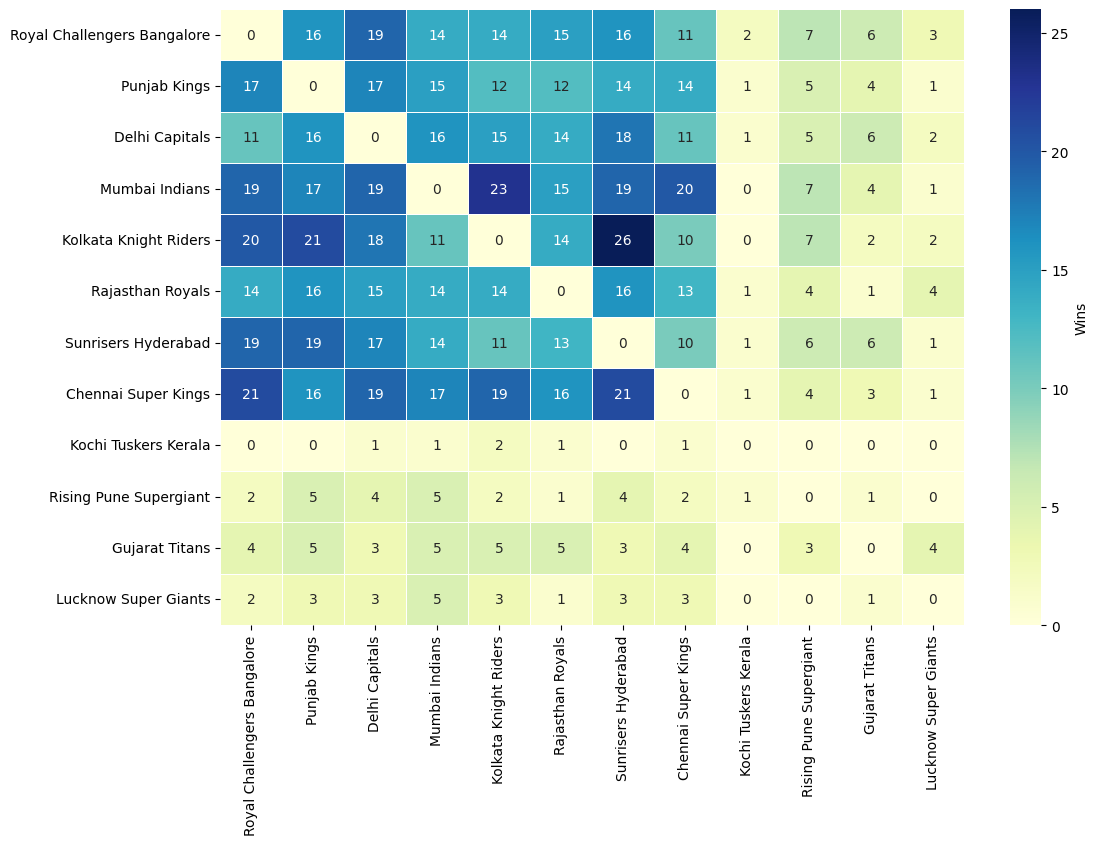

In [ ]:
import seaborn as sns
teams=pd.concat([matches['team1'],matches['team2']]).unique()
head_to_head_matrix=pd.DataFrame(0,index=teams,columns=teams)
for _, row in matches.iterrows():
  winner=row['winner']
  if winner==row['team1']:
    head_to_head_matrix.loc[row['team1'],row['team2']]+=1
  elif winner==row['team2']:
    head_to_head_matrix.loc[row['team2'],row['team1']]+=1
plt.figure(figsize=(12,8))
sns.heatmap(head_to_head_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar_kws={'label':'Wins'},linewidths=0.5)